In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [124]:
course_rec_sys = 'courseRecSys.xlsx'

In [125]:
df = pd.read_excel(course_rec_sys,
header=0,
index_col=False,
keep_default_na=True
)

In [126]:
df

,ID,Start time,Completion time,Email,Name,Name(not mandatory)\n,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,6,2023-01-30 14:04:19,2023-01-30 14:05:54,anonymous,NaN,NaN,0.30,0.85,0.85,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,7,2023-01-30 14:04:44,2023-01-30 14:12:35,anonymous,NaN,Rahul Jain,0.70,0.80,0.20,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,8,2023-01-30 14:11:07,2023-01-30 14:12:47,anonymous,NaN,NaN,0.70,0.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,9,2023-01-30 19:10:54,2023-01-30 19:12:35,anonymous,NaN,Adrij Sharma,0.65,0.70,0.20,0.75,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,10,2023-01-30 22:58:02,2023-01-30 23:00:34,anonymous,NaN,NaN,0.70,0.60,0.20,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,163,2023-02-25 09:36:58,2023-02-25 09:39:26,anonymous,NaN,Shivankar Pilligundla,0.00,1.00,0.50,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,164,2023-02-25 10:32:07,2023-02-25 10:33:29,anonymous,NaN,NaN,1.00,0.00,0.00,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,165,2023-02-25 16:23:18,2023-02-25 16:25:04,anonymous,NaN,NaN,0.60,0.30,0.40,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,166,2023-02-27 09:46:02,2023-02-27 09:46:57,anonymous,NaN,NaN,0.80,0.60,0.20,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)

In [128]:
# df.rename(columns = {'Name(not mandatory)\n':'Name'}, inplace = True)

change 0.5 to average of ratings of that user

In [129]:
df["avg"] = df.mean(axis = 1, skipna=True, numeric_only=True)
df.apply(lambda row: row.fillna(row["avg"]), axis=1)
df = df.drop(["avg"],axis =1)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,NaN,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df=df.replace(np.nan, 0.5)
df 

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.50,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.5,0.5,0.5
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.5
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.8,0.5,0.5,0.8,0.5
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.50,0.5,0.7,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [131]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [132]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

In [133]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
# kmeans.fit_predict(df[courses])    
kmeans.fit_predict(df[core_courses])    

array([0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 2], dtype=int32)

In [134]:
wcss = []  #Within Cluster Sum of Squares
for number_of_clusters in range(1, 15): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(df[core_courses]) 
    wcss.append(kmeans.inertia_)
wcss

[82.11226015529861,
 63.24078648485307,
 51.758327711871,
 44.960536327093386,
 39.89398687872323,
 36.14482368312088,
 33.398702023260036,
 30.5695359693512,
 28.142142856387895,
 25.495720837938926,
 24.303521924994463,
 22.250775245363176,
 21.26505642848125,
 19.7185773653146]

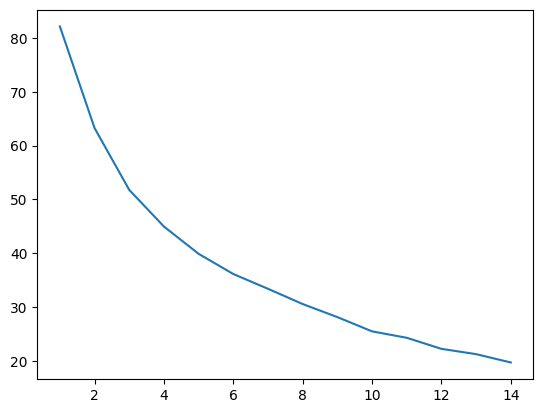

In [135]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10,11,12,13,14]
plt.plot(ks, wcss)

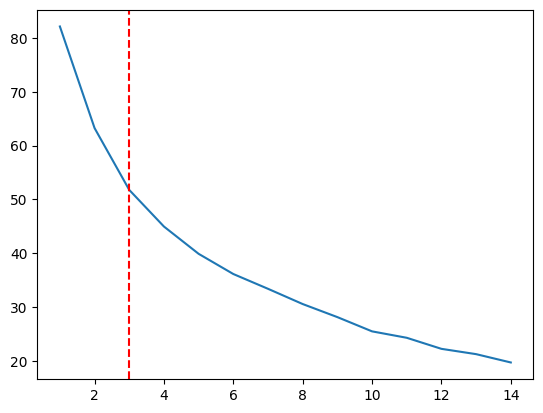

In [136]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10,11,12,13,14]
plt.plot(ks, wcss);
plt.axvline(3, linestyle='--', color='r')

In [137]:
k = 10
kmeans = KMeans(n_clusters = k, random_state = 42)
clustered_matrix = kmeans.fit_predict(df[core_courses]) 


In [138]:
kmeans.cluster_centers_

array([[0.64285714, 0.04285714, 0.91428571, 0.02142857, 0.91428571],
       [0.92545455, 0.87545455, 0.91575758, 0.8730303 , 0.94363636],
       [0.65      , 0.2       , 0.21666667, 0.76111111, 0.79444444],
       [0.8425    , 0.505     , 0.165     , 0.1       , 0.88      ],
       [0.97692308, 0.96153846, 0.98384615, 0.04615385, 0.96923077],
       [0.77142857, 0.91428571, 0.88571429, 0.44285714, 0.18571429],
       [0.91923077, 0.90769231, 0.14615385, 0.90384615, 0.80384615],
       [0.88888889, 0.21333333, 0.85      , 0.85      , 0.88888889],
       [0.21263684, 0.895     , 0.48623536, 0.94725284, 0.73878777],
       [0.8353125 , 0.7946875 , 0.6403125 , 0.6065625 , 0.8303125 ]])

In [139]:

    
df.head()


,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.50,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.5,0.5,0.5
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.5
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.8,0.5,0.5,0.8,0.5
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
a = np.array([12,2,3])
b = np.array([2,2,3])
c = a+b
c

array([14,  4,  6])

In [141]:
arr = df.to_numpy()
arr[0].shape

(25,)

In [142]:
clustered_df =[]
for i in range(k):
    # print(k)
    users = 0
    s=np.zeros(25)
    for j in range(len(clustered_matrix)):#162
        
        if clustered_matrix[j]==i:
            # print("Matched")
            s+=arr[j]
            users = users + 1
    print(s)
    print(users)
    mean = s/users
    clustered_df.append(mean)







[4.5  0.3  6.4  0.15 6.4  6.8  6.7  5.6  3.5  4.3  3.7  2.5  3.1  4.6
 4.1  1.6  0.6  0.7  1.6  0.7  1.05 1.5  1.9  1.   3.  ]
7
[30.54 28.89 30.22 28.81 31.14 24.59 25.12 22.35 16.95 17.4  19.7  17.
 22.2  20.7  20.85 13.2  13.9  14.3  13.6  14.   17.85 14.88 16.93 19.55
 16.35]
33
[11.7   3.6   3.9  13.7  14.3  12.7   9.5   8.5   7.9   7.9  10.4   9.
  9.6   8.2  10.5   6.8   6.9   6.8   6.8   6.8   9.8   9.55  9.4   9.5
 11.6 ]
18
[16.85 10.1   3.3   2.   17.6  15.45 11.7  10.45 10.24 11.29 14.05  7.95
  8.35 12.7  11.1   6.5   5.3   5.    5.5   4.5   5.4   6.6   7.2   5.1
  7.5 ]
20
[12.7  12.5  12.79  0.6  12.6  11.6  10.8   6.5  10.    9.    7.2   5.1
  7.4   6.2   5.3   5.5   5.5   5.    5.    4.    3.5   7.1   5.5   3.5
  8.25]
13
[5.4 6.4 6.2 3.1 1.3 5.6 5.3 3.8 4.2 3.5 5.3 3.3 2.6 2.  2.3 2.  2.3 1.5
 2.7 2.1 1.5 1.4 2.1 1.9 1.7]
7
[11.95 11.8   1.9  11.75 10.45 10.3   8.05  8.65  7.4   7.5   8.3   5.81
  7.2   4.7   6.8   5.    6.    5.7   5.2   4.5   7.3   7.4   6.6   7.8
 

In [143]:
(clustered_df)

[array([0.64285714, 0.04285714, 0.91428571, 0.02142857, 0.91428571,
        0.97142857, 0.95714286, 0.8       , 0.5       , 0.61428571,
        0.52857143, 0.35714286, 0.44285714, 0.65714286, 0.58571429,
        0.22857143, 0.08571429, 0.1       , 0.22857143, 0.1       ,
        0.15      , 0.21428571, 0.27142857, 0.14285714, 0.42857143]),
 array([0.92545455, 0.87545455, 0.91575758, 0.8730303 , 0.94363636,
        0.74515152, 0.76121212, 0.67727273, 0.51363636, 0.52727273,
        0.5969697 , 0.51515152, 0.67272727, 0.62727273, 0.63181818,
        0.4       , 0.42121212, 0.43333333, 0.41212121, 0.42424242,
        0.54090909, 0.45090909, 0.5130303 , 0.59242424, 0.49545455]),
 array([0.65      , 0.2       , 0.21666667, 0.76111111, 0.79444444,
        0.70555556, 0.52777778, 0.47222222, 0.43888889, 0.43888889,
        0.57777778, 0.5       , 0.53333333, 0.45555556, 0.58333333,
        0.37777778, 0.38333333, 0.37777778, 0.37777778, 0.37777778,
        0.54444444, 0.53055556, 0.52222222, 

In [144]:
df = pd.DataFrame(clustered_df, columns = courses)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.642857,0.042857,0.914286,0.021429,0.914286,0.971429,0.957143,0.800000,0.500000,0.614286,...,0.228571,0.085714,0.100000,0.228571,0.100000,0.150000,0.214286,0.271429,0.142857,0.428571
1,0.925455,0.875455,0.915758,0.873030,0.943636,0.745152,0.761212,0.677273,0.513636,0.527273,...,0.400000,0.421212,0.433333,0.412121,0.424242,0.540909,0.450909,0.513030,0.592424,0.495455
2,0.650000,0.200000,0.216667,0.761111,0.794444,0.705556,0.527778,0.472222,0.438889,0.438889,...,0.377778,0.383333,0.377778,0.377778,0.377778,0.544444,0.530556,0.522222,0.527778,0.644444
3,0.842500,0.505000,0.165000,0.100000,0.880000,0.772500,0.585000,0.522500,0.512000,0.564500,...,0.325000,0.265000,0.250000,0.275000,0.225000,0.270000,0.330000,0.360000,0.255000,0.375000
4,0.976923,0.961538,0.983846,0.046154,0.969231,0.892308,0.830769,0.500000,0.769231,0.692308,...,0.423077,0.423077,0.384615,0.384615,0.307692,0.269231,0.546154,0.423077,0.269231,0.634615
5,0.771429,0.914286,0.885714,0.442857,0.185714,0.800000,0.757143,0.542857,0.600000,0.500000,...,0.285714,0.328571,0.214286,0.385714,0.300000,0.214286,0.200000,0.300000,0.271429,0.242857
6,0.919231,0.907692,0.146154,0.903846,0.803846,0.792308,0.619231,0.665385,0.569231,0.576923,...,0.384615,0.461538,0.438462,0.400000,0.346154,0.561538,0.569231,0.507692,0.600000,0.515385
7,0.888889,0.213333,0.850000,0.850000,0.888889,0.700000,0.666667,0.544444,0.544444,0.522222,...,0.300000,0.288889,0.322222,0.288889,0.300000,0.466667,0.622222,0.577778,0.611111,0.555556
8,0.212637,0.895000,0.486235,0.947253,0.738788,0.631255,0.588258,0.518258,0.567854,0.615255,...,0.370000,0.360000,0.350000,0.350000,0.370000,0.350000,0.545166,0.480000,0.510000,0.590000
9,0.835312,0.794688,0.640312,0.606563,0.830313,0.787500,0.750000,0.642500,0.542187,0.606250,...,0.456875,0.469375,0.426250,0.448437,0.440625,0.420312,0.518750,0.500000,0.450000,0.495313


In [145]:
# svd = TruncatedSVD(n_components=5, n_iter=100, random_state=42)

In [146]:
# truncated_matrix = svd.fit_transform(clustered_df)
# truncated_matrix.shape

In [147]:
# print(svd.explained_variance_ratio_)
# eigen_values = svd.explained_variance_ratio_

In [148]:
import numpy as np

def reduced_svd(A):
    
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    inv_Sigma[:A.shape[0], :A.shape[0]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

In [149]:
# # import numpy as np

# def reduced_svd(A,k):
    
#     # Step 1: Compute the transpose of A
#     AT = A.T
#     # Step 2: Compute the product A x AT
#     ATA = A.dot(AT)
#     # Step 3: Compute the eigenvalues and eigenvectors of ATA
#     eigenvalues, eigenvectors = np.linalg.eig(ATA)
#     # Step 4: Sort the eigenvalues in descending order
#     sorted_idx = eigenvalues.argsort()[::-1]
#     eigenvalues = eigenvalues[sorted_idx][:k]
#     eigenvectors = eigenvectors[:, sorted_idx]
#     # Step 5: Compute the diagonal matrix Sigma
#     Sigma = np.sqrt(eigenvalues)
#     # Step 6: Compute the pseudo-inverse of Sigma
#     inv_Sigma = np.zeros((k,k))
#     inv_Sigma = np.diag(1.0 / Sigma)
#     # Step 7: Compute the product AT x V x inv(Sigma)
#     V = AT.dot(eigenvectors)
#     # Step 8: Normalize the columns of V
#     V = V / np.linalg.norm(V, axis=0)
#     # Step 9: Compute the product A x U x Sigma^-1
#     U = A.dot(V) / Sigma
#     return U, Sigma, V.T

In [150]:
U,sigma,VT = reduced_svd(np.array(clustered_df))

In [151]:
U.shape,sigma.shape,VT.shape

((10, 10), (10,), (10, 25))

In [152]:
k=6

In [153]:
reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
# reduced_matrix

In [154]:
reduced_matrix

array([[0.64607042, 0.02277649, 0.92961378, 0.00553377, 0.9015911 ,
        0.9508936 , 0.92749647, 0.7426695 , 0.51175526, 0.61057167,
        0.59232437, 0.38381256, 0.43657092, 0.69117195, 0.58783569,
        0.23900314, 0.08801267, 0.09783626, 0.2312658 , 0.1234369 ,
        0.1389443 , 0.21929155, 0.29219419, 0.14446179, 0.42772122],
       [0.83463408, 0.81113896, 0.87656804, 0.85790794, 0.86682858,
        0.81748719, 0.78614399, 0.63881063, 0.63463013, 0.62005813,
        0.67422477, 0.52129293, 0.63783595, 0.51683026, 0.54839629,
        0.41356441, 0.43426564, 0.41796189, 0.42331583, 0.41323976,
        0.4801958 , 0.57913929, 0.55392685, 0.5752579 , 0.59647288],
       [0.69339273, 0.26323531, 0.21141174, 0.81477215, 0.88552055,
        0.66120062, 0.52609995, 0.54809524, 0.41520293, 0.46837202,
        0.55955171, 0.43784295, 0.50621945, 0.47731372, 0.56513759,
        0.33467204, 0.32812698, 0.35285611, 0.31473038, 0.31999828,
        0.51802251, 0.53132594, 0.51338679, 0.

In [155]:
# reduced_matrix = truncated_matrix

In [156]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

new user with just core courses ratings. Now we need elective courses

In [157]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]

In [158]:

def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [165]:
find_cluster(reduced_matrix,sooraj)

8

In [160]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [161]:
elective_ratings = find_elective_ratings(reduced_matrix,chinmay)

# ranking of electives

In [162]:
d={courses[5:][i]: elective_ratings[i] for i in range(20)}

elective_ranked = sorted(courses[5:], key=lambda x : d[x])

In [163]:
elective_ranked

['VLSI Architecture Design\n',
 'High level synthesis and optimization of Digital Circuits ',
 'System design with FPGA ',
 'Digital CMOS VLSI Design ',
 'ASIC design ',
 'Natural Language Processing\n',
 'Computer Graphics\n',
 'Reinforcement Learning',
 'Programming Languages\n',
 'Data Visualization\n',
 'Technology Ethics and AI ',
 'Digital Sociology ',
 'Mathematics For Machine Learning\n',
 'Privacy in the Digital Age',
 'The Web and the Mind ',
 'Visual Recognition\n',
 'Techno-economics of networks ',
 'Software Production Engineering\n',
 'Cloud Computing\n',
 'Machine Learning\n']

change the nan values to average of the item instead of average of user ratings.

in find elective rating find the ratings from the clustered matrix and not reduced matrix.